In [157]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

In [57]:
data = pd.read_csv("train.csv")

In [58]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [60]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [61]:
data.shape

(1460, 81)

In [62]:
# dataframe with categorical features
data.describe(include=['object']).T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [63]:
# dataframe with numerical features
data.describe(include=['int64']).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [64]:
target = data['SalePrice']   #y
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

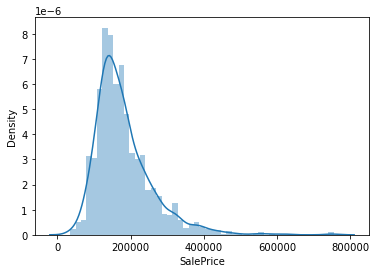

In [65]:
# Visualizing the distribution of Salesprice(Dependent) variable 
import seaborn as sns
sns.distplot(target,hist=True)

As we can see the distribution is left skewed, so in order to make it normally distributed, we need to use log transformation.

In [66]:
# Log transformation
import numpy as np
target_log  = np.log(target) #y 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

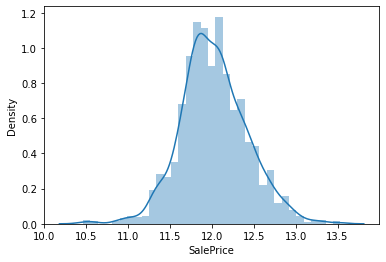

In [67]:
sns.distplot(target_log,hist=True)

In [68]:
{"Sale Price":data["SalePrice"],"Log Sale Price ":target_log}

{'Sale Price': 0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64,
 'Log Sale Price ': 0       12.247694
 1       12.109011
 2       12.317167
 3       11.849398
 4       12.429216
           ...    
 1455    12.072541
 1456    12.254863
 1457    12.493130
 1458    11.864462
 1459    11.901583
 Name: SalePrice, Length: 1460, dtype: float64}

array([[<AxesSubplot:title={'center':'Sale Price'}>,
        <AxesSubplot:title={'center':'Log Sale Price '}>]], dtype=object)

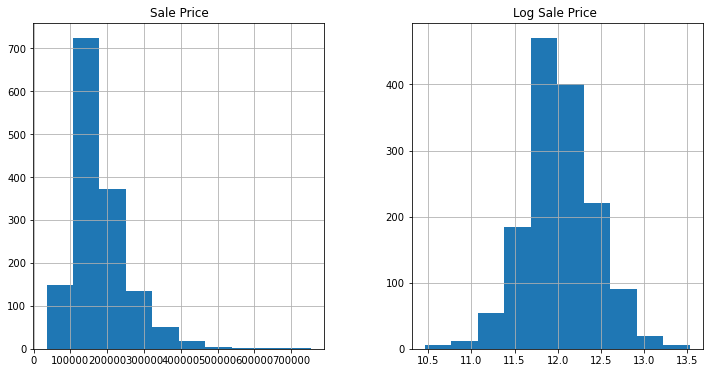

In [69]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Sale Price":data["SalePrice"],"Log Sale Price ":target_log})
prices.hist()

In [70]:
data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [71]:
# without target variable 
data1 =data.iloc[:,:-1]
data1.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [72]:
# drop target variable from dataset
raw_data = data
data = data.drop(["SalePrice"], axis=1)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [74]:
#MSSubClass=The building class
data['MSSubClass'] = data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
data['OverallCond'] = data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [75]:
# Adding total sqfootage feature 
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
# Removing TotalBsmtSF,1stFlrSF, 2ndFlrSF and Id
data = data.drop(["TotalBsmtSF"], axis=1)
data = data.drop(["1stFlrSF"], axis=1)
data = data.drop(["2ndFlrSF"], axis=1)
data = data.drop(["Id"], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


In [76]:
# save all categorical columns in list
categorical_columns = [col for col in data.columns.values if data[col].dtype == 'object']

# dataframe with categorical features
data_cat = data[categorical_columns]
# dataframe with numerical features
data_num = data.drop(categorical_columns, axis=1)

In [77]:
# Using describe function in numeric dataframe 
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.0,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.0,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.0,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.0,477.5,808.00,2336.0
LowQualFinSF,1460.0,5.844521,48.623081,0.0,0.0,0.0,0.00,572.0


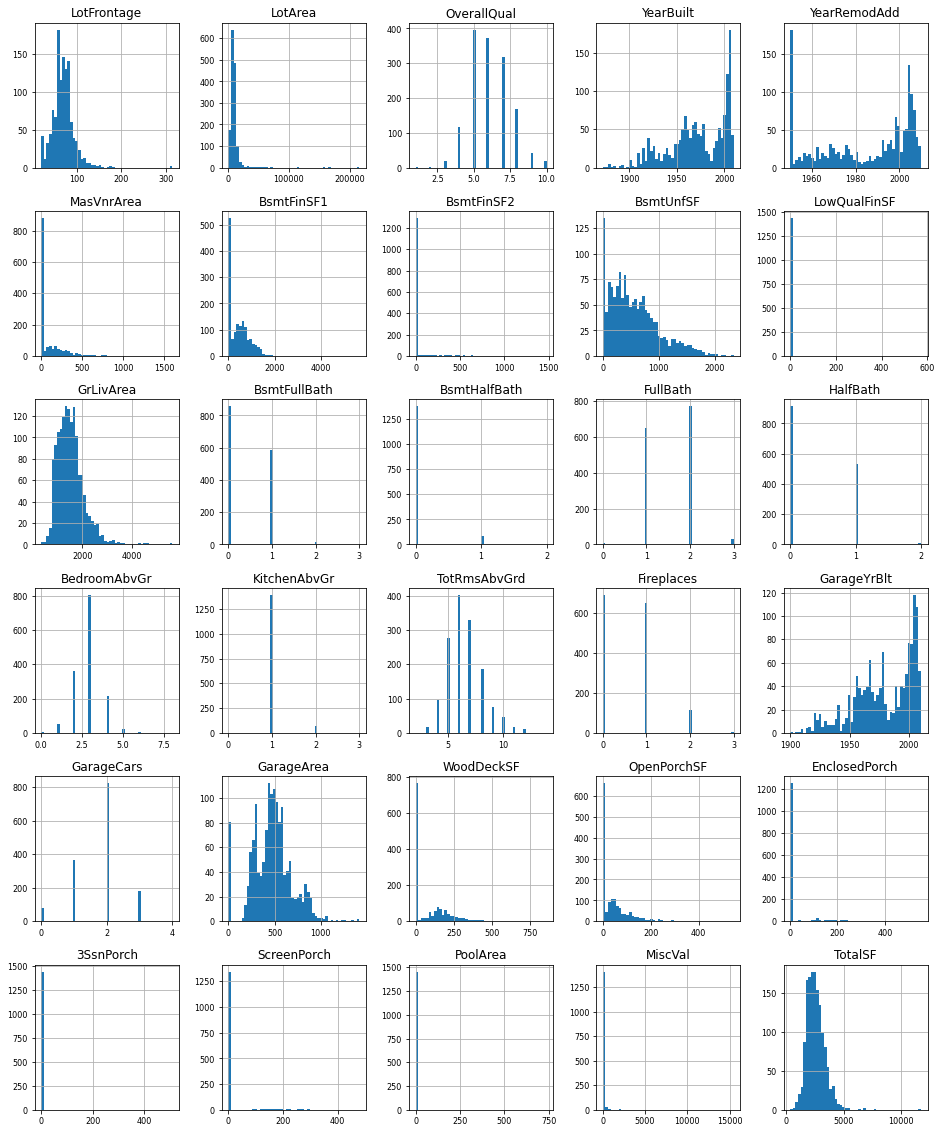

In [78]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbo

In [79]:
data_num.isnull().sum().sum()

348

In [80]:
from scipy.stats import skew

data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
data_num_skew

LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

In [81]:
data_num[data_num_skew.index]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,65.0,8450,7,2003,2003,196.0,706,0,150,0,...,2,548,0,61,0,0,0,0,0,2566
1,80.0,9600,6,1976,1976,0.0,978,0,284,0,...,2,460,298,0,0,0,0,0,0,2524
2,68.0,11250,7,2001,2002,162.0,486,0,434,0,...,2,608,0,42,0,0,0,0,0,2706
3,60.0,9550,7,1915,1970,0.0,216,0,540,0,...,3,642,0,35,272,0,0,0,0,2473
4,84.0,14260,8,2000,2000,350.0,655,0,490,0,...,3,836,192,84,0,0,0,0,0,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,0,953,0,...,2,460,0,40,0,0,0,0,0,2600
1456,85.0,13175,6,1978,1988,119.0,790,163,589,0,...,2,500,349,0,0,0,0,0,0,3615
1457,66.0,9042,7,1941,2006,0.0,275,0,877,0,...,1,252,0,60,0,0,0,0,2500,3492
1458,68.0,9717,5,1950,1996,0.0,49,1029,0,0,...,1,240,366,0,112,0,0,0,0,2156


In [82]:
data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewnes over .75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

In [83]:
data_num[data_num_skew.index] 

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,4.189655,9.042040,5.283204,6.561031,0.000000,5.017280,0.0,7.444833,0.000000,0.693147,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,7.850493
1,4.394449,9.169623,0.000000,6.886532,0.000000,5.652489,0.0,7.141245,0.693147,0.693147,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.833996
2,4.234107,9.328212,5.093750,6.188264,0.000000,6.075346,0.0,7.488294,0.000000,0.693147,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,7.903596
3,4.110874,9.164401,0.000000,5.379897,0.000000,6.293419,0.0,7.448916,0.000000,0.693147,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,7.813592
4,4.442651,9.565284,5.860786,6.486161,0.000000,6.196444,0.0,7.695758,0.000000,0.693147,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,0.000000,0.000000,0.000000,6.860664,0.0,7.407318,0.000000,0.693147,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,7.863651
1456,4.454347,9.486152,4.787492,6.673298,5.099866,6.380123,0.0,7.637234,0.000000,0.693147,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,8.193124
1457,4.204693,9.109746,0.000000,5.620401,0.000000,6.777647,0.0,7.758333,0.000000,0.693147,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,8.158516
1458,4.234107,9.181735,0.000000,3.912023,6.937314,0.000000,0.0,6.983790,0.000000,0.693147,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,7.676474


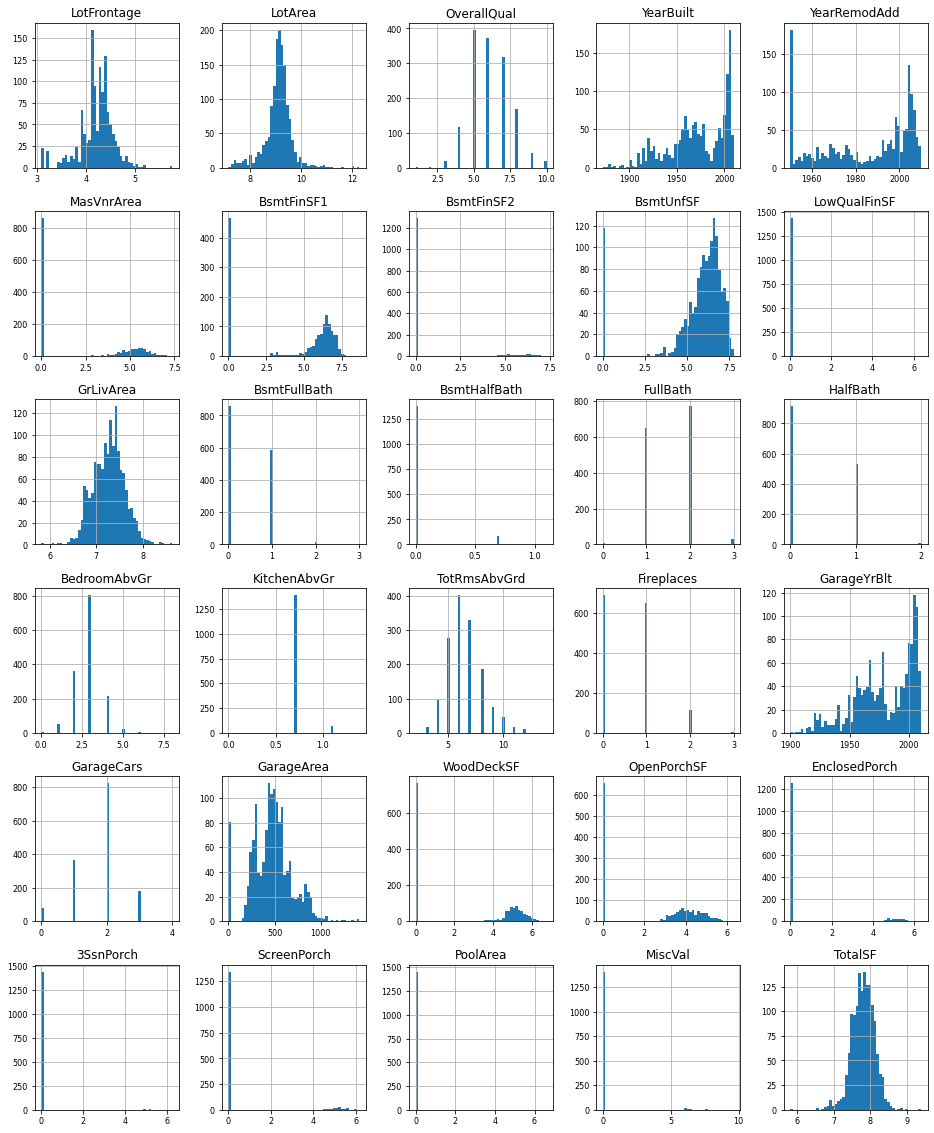

In [84]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [85]:
data_num = ((data_num - data_num.mean())/(data_num.max() - data_num.min()))
data_num.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,1.494947e-15,0.130242,-0.419834,-0.042419,0.015568,0.070472,0.580166
LotArea,1460.0,4.984835e-16,0.101273,-0.379763,-0.035443,0.008989,0.048547,0.620237
OverallQual,1460.0,1.946692e-17,0.153666,-0.566591,-0.122146,-0.011035,0.100076,0.433409
YearBuilt,1460.0,2.267735e-16,0.218862,-0.719332,-0.125129,0.012552,0.208204,0.280668
YearRemodAdd,1460.0,1.541119e-15,0.344090,-0.581096,-0.297763,0.152237,0.318904,0.418904
MasVnrArea,1452.0,-2.879545e-16,0.356618,-0.288945,-0.288945,-0.288945,0.404702,0.711055
BsmtFinSF1,1460.0,4.277020e-16,0.346361,-0.489636,-0.489636,0.199364,0.270891,0.510364
BsmtFinSF2,1460.0,1.277517e-17,0.252870,-0.089825,-0.089825,-0.089825,-0.089825,0.910175
BsmtUnfSF,1460.0,5.977049e-16,0.239024,-0.728201,-0.030520,0.067333,0.135036,0.271799
LowQualFinSF,1460.0,-2.756072e-17,0.117677,-0.015717,-0.015717,-0.015717,-0.015717,0.984283


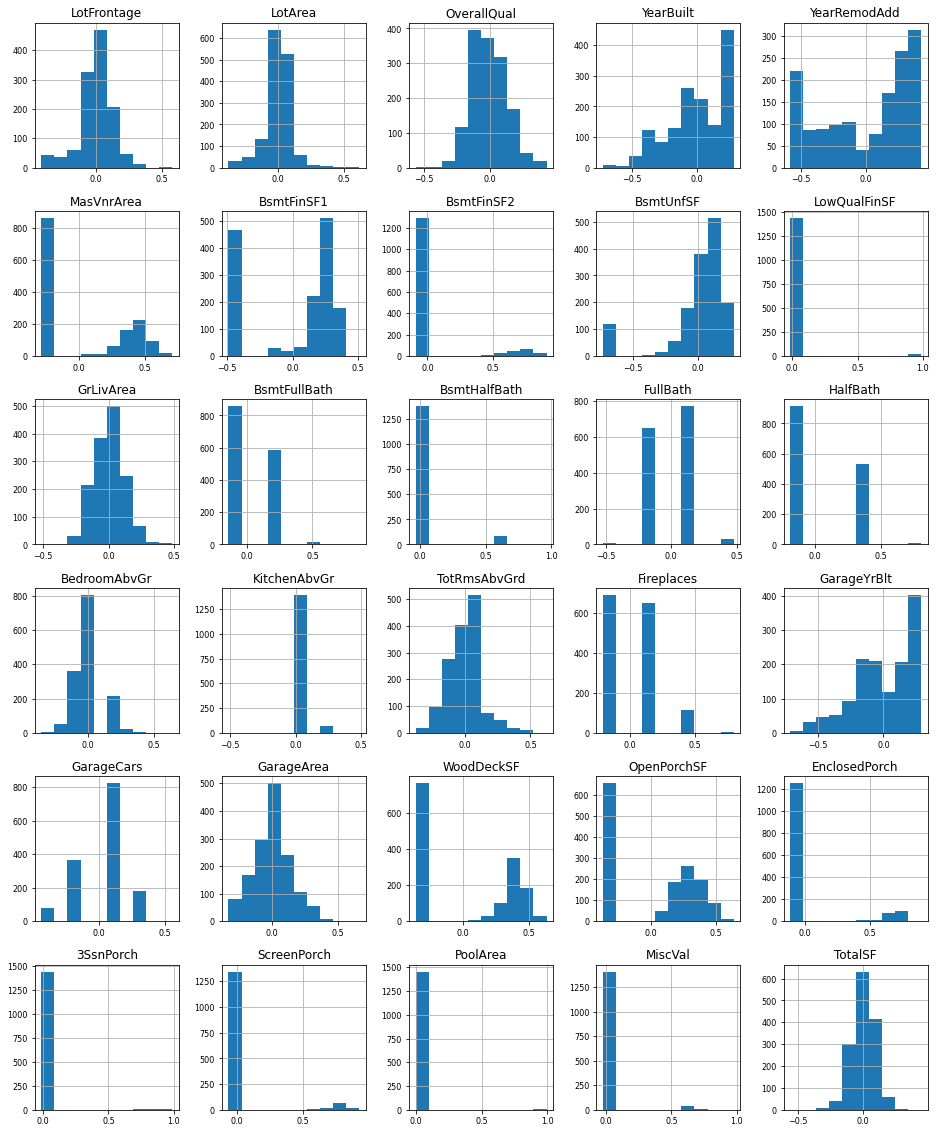

In [86]:
data_num.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

<AxesSubplot:>

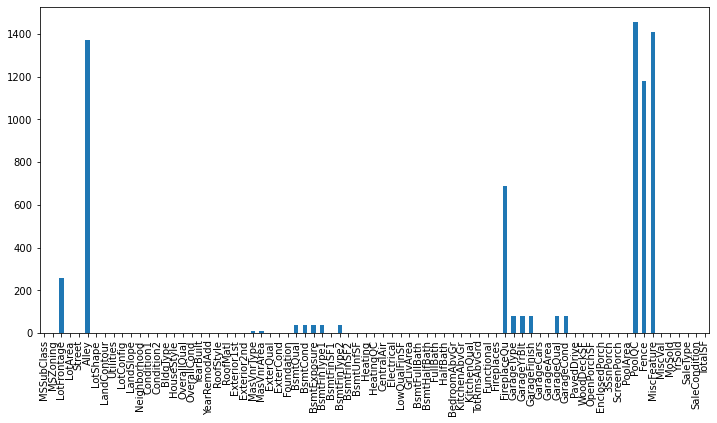

In [87]:
data.isnull().sum().plot.bar()

In [88]:
data.isnull().sum().sum()

6965

<AxesSubplot:>

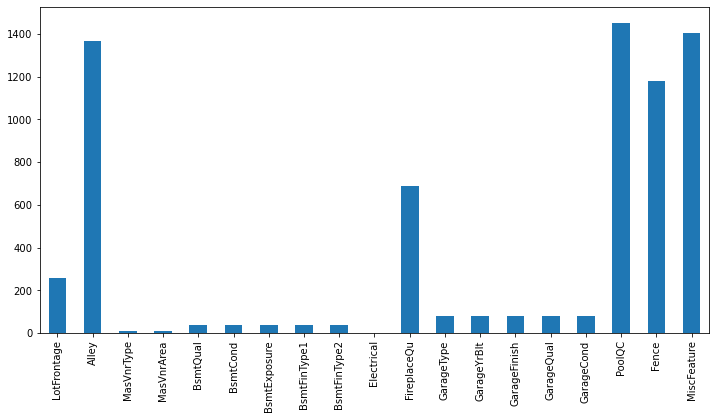

In [89]:
data_null = data.isnull().sum()
data_null = data_null[data_null > 0]
data_null.plot.bar()

In [90]:
# Printing total numbers and percentage of missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479


In [91]:
data_len = data_num.shape[0]
data_len

1460

In [92]:
# check what is percentage of missing values in categorical dataframe
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        #print("droping column: {}".format(col))
        data_num = data_num.drop(col, axis = 1)
    # if there is less than 260 missing values than fill in with median valu of column
    else:
        #print("filling missing values with median in column: {}".format(col))
        data_num = data_num.fillna(data_num[col].median())

In [93]:
data_len = data_cat.shape[0]
data_len

1460

In [94]:
# check what is percentage of missing values in categorical dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    #print("{} - missing values: {} ({:0.2f}%)".format(col, missing_values, missing_values/data_len*100)) 
    
    # drop column if there is more than 50 missing values
    if missing_values > 50:
        print("droping column: {}".format(col))
        data_cat.drop(col, axis = 1)
    # if there is less than 50 missing values than fill in with median valu of column
    else:
        #print("filling missing values with XXX: {}".format(col))
        #data_cat = data_cat.fillna('XXX')
        pass

droping column: Alley
droping column: FireplaceQu
droping column: GarageType
droping column: GarageFinish
droping column: GarageQual
droping column: GarageCond
droping column: PoolQC
droping column: Fence
droping column: MiscFeature


In [95]:
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [96]:
len(data_cat.columns)

47

In [97]:
# Using pandas.get_dummies function to Convert categorical variable into dummy/indicator variables
data_cat_dummies  = pd.get_dummies(data_cat,drop_first=True)

In [98]:
len(data_cat_dummies.columns)

246

In [99]:
# Viewing dimensionality of the DataFrame.
data_cat_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [100]:
print("Numerical features : " + str(len(data_num.columns)))
print("Categorical features : " + str(len(data_cat_dummies.columns)))

Numerical features : 30
Categorical features : 246


In [101]:
# using concat function we merging two dataframe for furthere analysis
newdata = pd.concat([data_num, data_cat_dummies], axis=1)
newdata.head(5)

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.006566,-0.013492,0.100076,0.229943,0.302237,0.427093,0.269872,-0.089825,-0.081362,-0.015717,...,0,0,0,0,1,0,0,0,1,0
1,0.070472,0.011482,-0.011035,0.034291,-0.147763,-0.288945,0.307553,-0.089825,0.000530,-0.015717,...,0,0,0,0,1,0,0,0,1,0
2,0.010156,0.042525,0.100076,0.215451,0.285571,0.401416,0.226721,-0.089825,0.055046,-0.015717,...,0,0,0,0,1,0,0,0,1,0
3,-0.036201,0.010460,0.100076,-0.407738,-0.247763,-0.288945,0.133144,-0.089825,0.083160,-0.015717,...,0,0,0,0,1,0,0,0,0,0
4,0.088605,0.088931,0.211187,0.208204,0.252237,0.505374,0.261205,-0.089825,0.070658,-0.015717,...,0,0,0,0,1,0,0,0,1,0


In [102]:
# Check Correlation
data_num.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
LotFrontage,1.000000,0.652386,0.205269,0.087589,0.059305,0.117652,0.067373,0.035608,0.102782,-0.006357,...,0.273091,0.317798,0.059865,0.133624,-0.021137,0.056284,0.044893,0.119599,0.028491,0.372916
LotArea,0.652386,1.000000,0.178220,0.021943,0.027672,0.070651,0.096966,0.084312,0.047510,-0.010681,...,0.272010,0.322048,0.122915,0.137754,-0.015186,0.055375,0.087518,0.097257,0.080298,0.427126
OverallQual,0.205269,0.178220,1.000000,0.572323,0.550684,0.413958,0.054199,-0.101469,0.268446,-0.029924,...,0.600671,0.562022,0.283256,0.445101,-0.158648,0.027546,0.049983,0.072651,-0.085131,0.678565
YearBuilt,0.087589,0.021943,0.572323,1.000000,0.592855,0.412631,0.151209,-0.068793,0.090576,-0.182266,...,0.537850,0.478954,0.307474,0.389065,-0.446694,0.028977,-0.059629,0.005805,-0.077819,0.366477
YearRemodAdd,0.059305,0.027672,0.550684,0.592855,1.000000,0.224771,0.012105,-0.102425,0.167086,-0.057486,...,0.420622,0.371600,0.285773,0.382743,-0.226996,0.052398,-0.039983,0.009025,-0.074574,0.362181
MasVnrArea,0.117652,0.070651,0.413958,0.412631,0.224771,1.000000,0.187145,-0.063123,0.093741,-0.108616,...,0.390094,0.371069,0.161452,0.209989,-0.186108,0.047022,0.037353,0.005346,-0.054501,0.382169
BsmtFinSF1,0.067373,0.096966,0.054199,0.151209,0.012105,0.187145,1.000000,0.185051,-0.265488,-0.063563,...,0.070302,0.117933,0.082144,0.015075,-0.127733,0.051775,0.073392,0.042147,0.018808,0.167094
BsmtFinSF2,0.035608,0.084312,-0.101469,-0.068793,-0.102425,-0.063123,0.185051,1.000000,-0.272666,0.006314,...,-0.053164,-0.018257,0.059134,-0.077644,0.038587,-0.022537,0.063879,0.068055,0.027978,0.019398
BsmtUnfSF,0.102782,0.047510,0.268446,0.090576,0.167086,0.093741,-0.265488,-0.272666,1.000000,0.001886,...,0.146919,0.113877,0.014448,0.182827,0.001014,0.004390,0.012820,-0.026761,-0.030640,0.377397
LowQualFinSF,-0.006357,-0.010681,-0.029924,-0.182266,-0.057486,-0.108616,-0.063563,0.006314,0.001886,1.000000,...,-0.094253,-0.071387,-0.037934,-0.000397,0.047332,0.016699,-0.014132,0.068662,0.025156,-0.022774


Text(0.5, 1.0, 'Correlation between features')

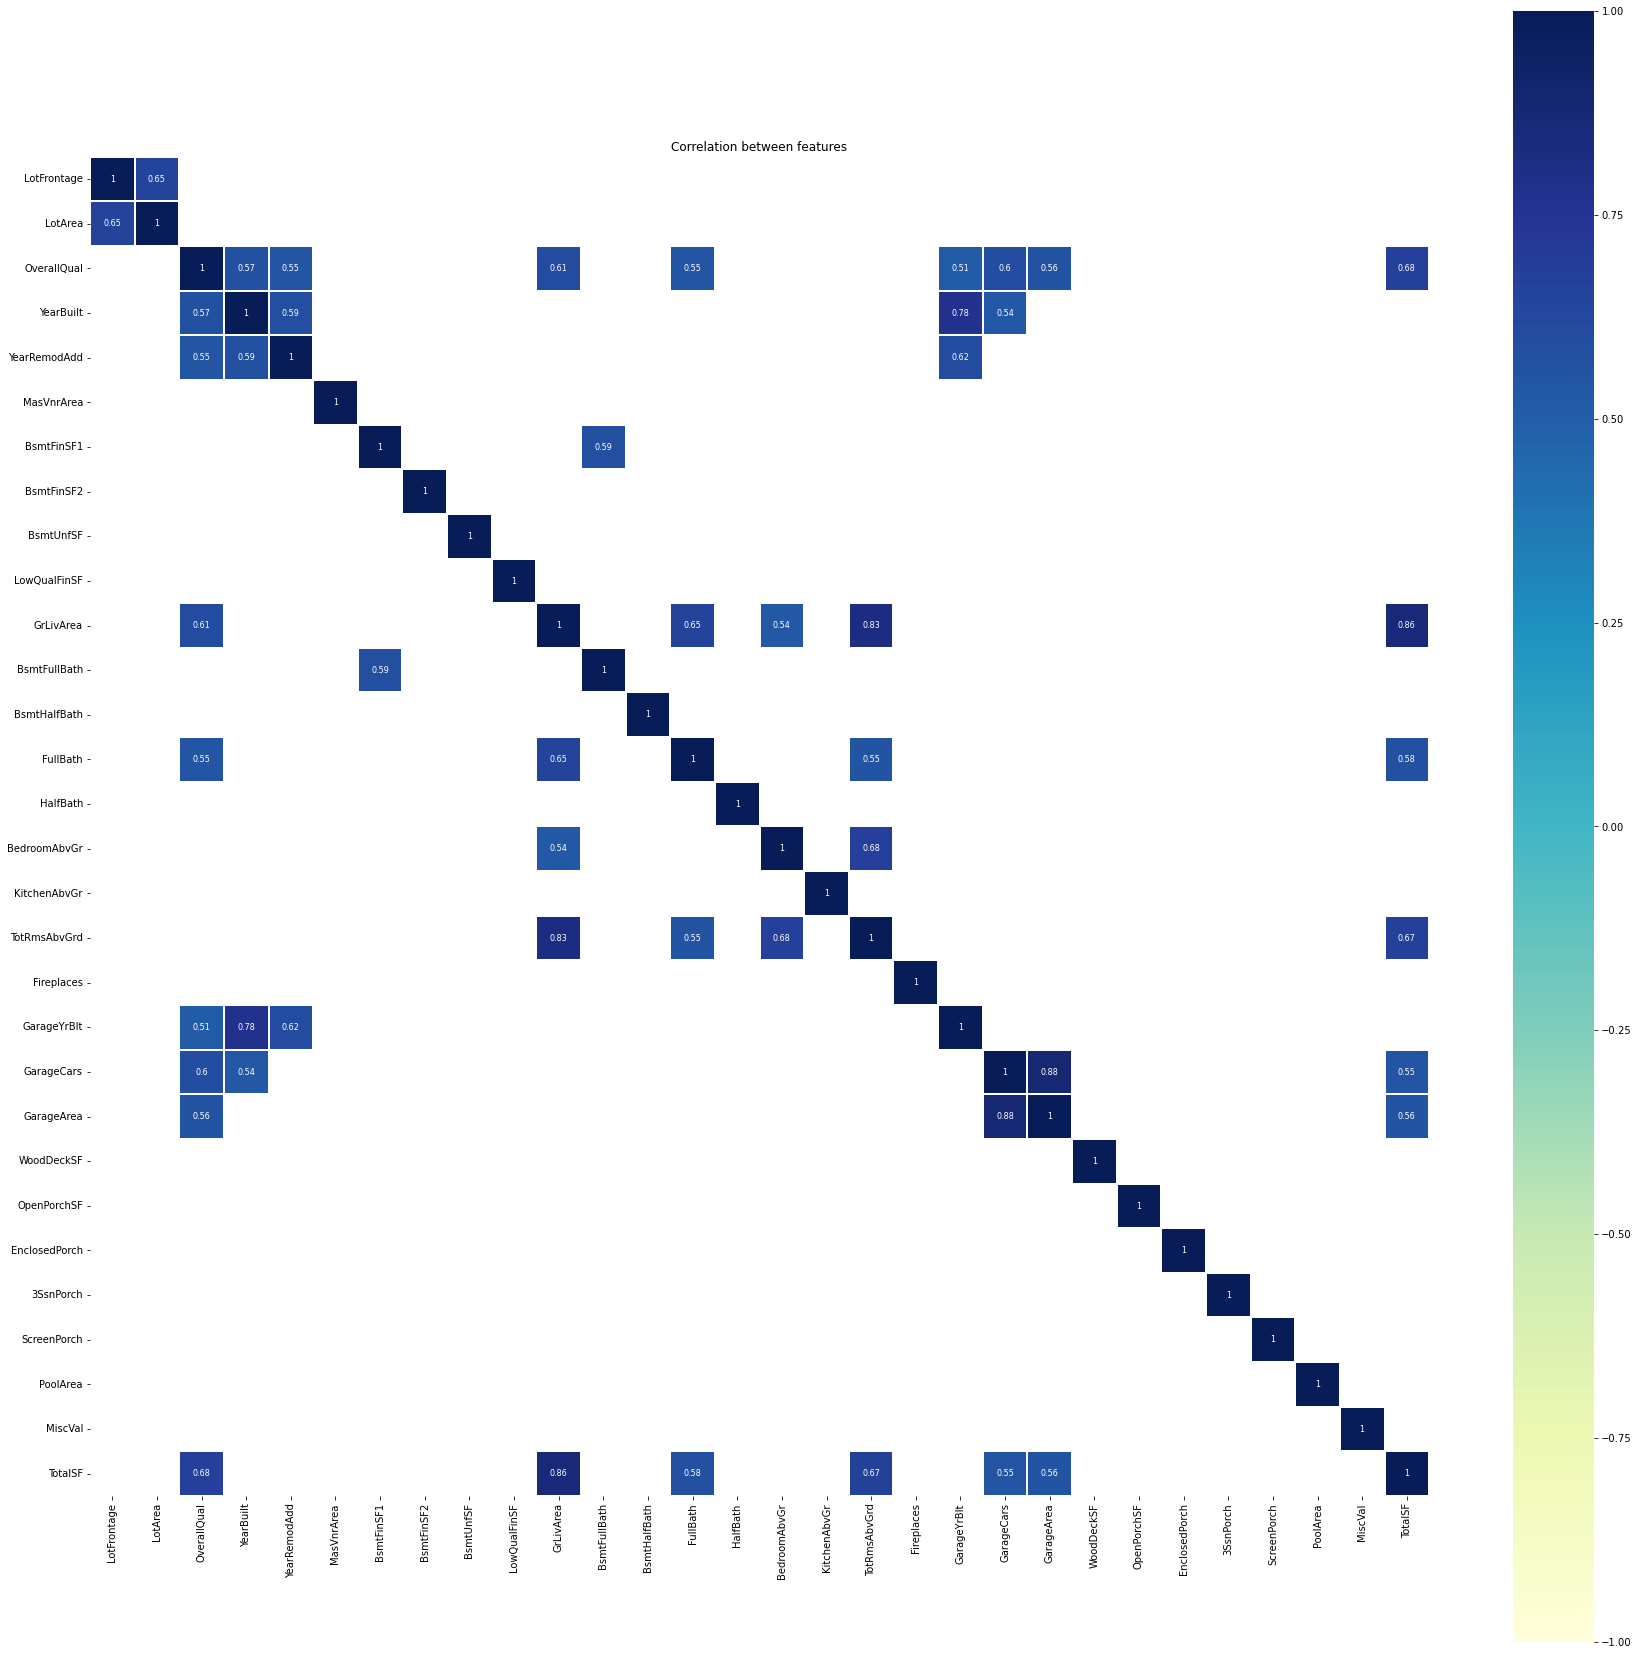

In [103]:
# Ploting correlation plot
import matplotlib.pyplot as plt
corr=data_num.corr()
plt.figure(figsize=(30, 30))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

In [104]:
# newdata = x (num+ cat)


In [322]:
#Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state=0)
print("x_train ",X_train.shape)
print("x_test ",X_test.shape)
print("y_train ",y_train.shape)
print("y_test ",y_test.shape)

x_train  (1022, 276)
x_test  (438, 276)
y_train  (1022,)
y_test  (438,)


In [323]:
# Lets build Linear Regression model using statsmodel
import statsmodels.api as sm

# Building Linear Regression model using OLS 
model1 = sm.OLS(y_train, X_train).fit()
# Note the Swap of X and Y 
# model1.fit()

In [324]:
# Printing Linear Regression Summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     65.93
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:34   Log-Likelihood:                 1105.1
No. Observations:                1022   AIC:                            -1680.
Df Residuals:                     757   BIC:                            -374.0
Df Model:                         264                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0851      0.051      1.656      0.098      -0.016       0.186
LotArea                   0.5269      0.079      6.655      0.000       0.371       0.682
OverallQual               0.3031      0.050      6.053      0.000       0.205       0.401
YearBuilt                 0.2539      0.065      3.888      0.000       0.126       0.382
YearRemodAdd              0.0491      0.019      2.613      0.009       0.012       0.086
MasVnrArea                0.0549      0.047      1.161      0.246      -0.038       0.148
BsmtFinSF1                0.0975      0.051      1.899      0.058      -0.003       0.198
BsmtFinSF2               -0.0001      0.077     -0.001      0.999      -0.151       0.150
BsmtUnfSF                -0.0355      0.026     -1.378      0.169      -0.086       0.015
LowQualFinSF              0.0102      0.040      0.257      0.797      -0.068       0.088
GrLivArea                 0.6069      0.179      3.383      0.001       0.255       0.959
BsmtFullBath              0.0870      0.031      2.832      0.005       0.027       0.147
BsmtHalfBath              0.0446      0.027      1.671      0.095      -0.008       0.097
FullBath                  0.1088      0.036      3.028      0.003       0.038       0.179
HalfBath                  0.0598      0.024      2.484      0.013       0.013       0.107
BedroomAbvGr             -0.0739      0.062     -1.199      0.231      -0.195       0.047
KitchenAbvGr             -0.1743      0.115     -1.513      0.131      -0.401       0.052
TotRmsAbvGrd              0.0416      0.059      0.701      0.484      -0.075       0.158
Fireplaces                0.0576      0.036      1.586      0.113      -0.014       0.129
GarageYrBlt              -0.0139      0.038     -0.369      0.712      -0.088       0.060
GarageCars                0.0163      0.052      0.316      0.752      -0.085       0.118
GarageArea                0.1902      0.063      3.018      0.003       0.066       0.314
WoodDeckSF                0.0395      0.010      3.821      0.000       0.019       0.060
OpenPorchSF               0.0078      0.013      0.617      0.538      -0.017       0.033
EnclosedPorch             0.0095      0.015      0.621      0.535      -0.021       0.040
3SsnPorch                -0.0038      0.034     -0.112      0.911      -0.070       0.062
ScreenPorch               0.0385      0.016      2.481      0.013       0.008       0.069
PoolArea                 -0.0219      0.164     -0.133      0.894      -0.344       0.301
MiscVal                   0.0422      0.092      0.460      0.645      -0.138       0.222
TotalSF                   0.9423      0.215      4.387      0.000       0.521       1.364
MSSubClass_160           -0.0668      0.058     -1.150      0.250      -0.181       0.047
MSSubClass_180         

In [325]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [326]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm,n_features_to_select=20,step=15)             
rfe = rfe.fit(X_train, y_train)

In [327]:
#creating a list names of variables,rfe support status and respecting ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 9),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 8),
 ('MasVnrArea', False, 9),
 ('BsmtFinSF1', False, 7),
 ('BsmtFinSF2', False, 18),
 ('BsmtUnfSF', False, 11),
 ('LowQualFinSF', False, 18),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 5),
 ('BsmtHalfBath', False, 10),
 ('FullBath', False, 8),
 ('HalfBath', False, 10),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 9),
 ('Fireplaces', False, 7),
 ('GarageYrBlt', False, 16),
 ('GarageCars', False, 16),
 ('GarageArea', False, 5),
 ('WoodDeckSF', False, 13),
 ('OpenPorchSF', False, 19),
 ('EnclosedPorch', False, 19),
 ('3SsnPorch', False, 19),
 ('ScreenPorch', False, 12),
 ('PoolArea', False, 11),
 ('MiscVal', False, 13),
 ('TotalSF', True, 1),
 ('MSSubClass_160', False, 9),
 ('MSSubClass_180', False, 11),
 ('MSSubClass_190', False, 13),
 ('MSSubClass_20', False, 12),
 ('MSSubClass_30', False, 9),
 ('MSSubClass_40', False

In [328]:
#creating instance for a index with all variable with rfe.support_ value as True.
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotalSF', 'MSSubClass_45', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Condition2_PosN',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkComm', 'ExterCond_Po',
       'BsmtCond_Po', 'Heating_Grav', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [329]:
#Viewing  variables with rfe.support_ value as False.
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal'],
      dtype='object', length=256)

In [330]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [331]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,SaleCondition_Partial,41.52
18,SaleType_New,41.34
13,HouseStyle_1.5Unf,14.59
7,MSSubClass_45,13.97
3,GrLivArea,5.54
6,TotalSF,5.13
1,OverallQual,2.83
2,YearBuilt,2.05
4,BedroomAbvGr,1.70
0,LotArea,1.62


In [332]:
# Add a constant
X_train_model_2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_2 = sm.OLS(y_train, X_train_model_2).fit()

# Print a summary of the linear regression model obtained
print(model_2.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     376.7
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:35   Log-Likelihood:                 576.53
No. Observations:                1022   AIC:                            -1111.
Df Residuals:                    1001   BIC:                            -1008.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.54

In [333]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_3 =X_train_model_2.drop(["SaleCondition_Partial"], axis = 1)

In [334]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('Observation')
print('all variables in X_train_model_3 have VIF less than 5.0')

               Features     VIF
0                 const  119.29
11          MSZoning_RL   19.30
12          MSZoning_RM   14.95
14    HouseStyle_1.5Unf   14.42
8         MSSubClass_45   13.82
4             GrLivArea    5.54
9           MSZoning_FV    5.48
7               TotalSF    5.13
2           OverallQual    2.85
10          MSZoning_RH    2.60
3             YearBuilt    2.08
5          BedroomAbvGr    1.70
1               LotArea    1.62
18         Heating_Grav    1.25
19         SaleType_New    1.20
6          KitchenAbvGr    1.17
13      Condition2_PosN    1.03
17          BsmtCond_Po    1.02
16         ExterCond_Po    1.01
15  Exterior1st_BrkComm    1.00
Observation
all variables in X_train_model_3 have VIF less than 5.0


In [335]:
# Add a constant
#X_train_model_3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_3 = sm.OLS(y_train, X_train_model_3).fit()

# Print a summary of the linear regression model obtained
print(model_3.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     394.9
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:36   Log-Likelihood:                 574.25
No. Observations:                1022   AIC:                            -1108.
Df Residuals:                    1002   BIC:                            -1010.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.5411    

In [336]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_4 =X_train_model_3.drop(["MSZoning_RL"], axis = 1)

In [337]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_4.values, i) for i in range(X_train_model_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('Observation')
print('all variables in X_train_model_3 have VIF less than 5.0')

               Features    VIF
13    HouseStyle_1.5Unf  14.42
8         MSSubClass_45  13.82
4             GrLivArea   5.54
7               TotalSF   5.13
2           OverallQual   2.83
3             YearBuilt   2.05
5          BedroomAbvGr   1.69
1               LotArea   1.62
11          MSZoning_RM   1.55
0                 const   1.44
17         Heating_Grav   1.25
18         SaleType_New   1.19
6          KitchenAbvGr   1.17
9           MSZoning_FV   1.14
10          MSZoning_RH   1.06
12      Condition2_PosN   1.03
16          BsmtCond_Po   1.02
15         ExterCond_Po   1.01
14  Exterior1st_BrkComm   1.00
Observation
all variables in X_train_model_3 have VIF less than 5.0


In [338]:
# Add a constant
#X_train_model_3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_4 = sm.OLS(y_train, X_train_model_4).fit()

# Print a summary of the linear regression model obtained
print(model_4.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     372.5
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:38   Log-Likelihood:                 523.44
No. Observations:                1022   AIC:                            -1009.
Df Residuals:                    1003   BIC:                            -915.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0253    

In [339]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_5 =X_train_model_4.drop(["HouseStyle_1.5Unf"], axis = 1)

In [340]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_5.values, i) for i in range(X_train_model_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

print('Observation')
print('all variables in X_train_model_3 have VIF less than 5.0')

               Features   VIF
4             GrLivArea  5.52
7               TotalSF  5.12
2           OverallQual  2.81
3             YearBuilt  2.04
5          BedroomAbvGr  1.69
1               LotArea  1.62
11          MSZoning_RM  1.54
0                 const  1.44
17         SaleType_New  1.19
6          KitchenAbvGr  1.17
9           MSZoning_FV  1.14
8         MSSubClass_45  1.07
10          MSZoning_RH  1.06
16         Heating_Grav  1.04
12      Condition2_PosN  1.03
15          BsmtCond_Po  1.02
14         ExterCond_Po  1.01
13  Exterior1st_BrkComm  1.00
Observation
all variables in X_train_model_3 have VIF less than 5.0


In [341]:
# Add a constant
#X_train_model_3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_5 = sm.OLS(y_train, X_train_model_5).fit()

# Print a summary of the linear regression model obtained
print(model_5.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     393.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:41   Log-Likelihood:                 521.48
No. Observations:                1022   AIC:                            -1007.
Df Residuals:                    1004   BIC:                            -918.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0256    

In [342]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_6 =X_train_model_5.drop(["MSSubClass_45"], axis = 1)

In [343]:
# Add a constant
#X_train_model_3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_6 = sm.OLS(y_train, X_train_model_6).fit()

# Print a summary of the linear regression model obtained
print(model_6.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     418.0
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:42   Log-Likelihood:                 521.37
No. Observations:                1022   AIC:                            -1009.
Df Residuals:                    1005   BIC:                            -924.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0257    

In [344]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_7 =X_train_model_6.drop(["MSZoning_RH"], axis = 1)

In [345]:
# Add a constant
#X_train_model_3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_7 = sm.OLS(y_train, X_train_model_7).fit()

# Print a summary of the linear regression model obtained
print(model_7.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     446.1
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:44   Log-Likelihood:                 521.19
No. Observations:                1022   AIC:                            -1010.
Df Residuals:                    1006   BIC:                            -931.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0252    

In [346]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_8 =X_train_model_7.drop(["MSZoning_FV"], axis = 1)

In [320]:
# Add a constant
#X_train_model_3 = sm.add_constant(X_train_rfe)

# Create a first fitted model
model_8 = sm.OLS(y_train, X_train_model_8).fit()

# Print a summary of the linear regression model obtained
print(model_8.summary())
print('observation')
print('feature humidity is insignificant as its p-value is 0.196, higher than 0.05')
print('We will drop faeture humidity and build new model')

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     477.7
Date:                Mon, 31 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:42:12   Log-Likelihood:                 520.45
No. Observations:                1022   AIC:                            -1011.
Df Residuals:                    1007   BIC:                            -936.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.0266    

In [347]:
#Removing insignificant variable
#Removing variable 'holiday_yes_holiday' as its p-value is more than 0.05 and VIF value is 5.78.
X_train_model_9 =X_train_model_8.drop(["ExterCond_Po","const"], axis = 1)

In [348]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_model_9, y_train)

LinearRegression()

In [349]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

12.02621541235174
[ 0.62514883  0.83772052  0.34652695  0.84595079 -0.31901728 -0.44338888
  1.29500831 -0.04129182 -1.38991974 -0.87639942 -0.36760437 -0.25483636
  0.07835642]


In [255]:
from sklearn.metrics import r2_score, mean_squared_error

In [350]:
X_test=X_test[X_train_model_9.columns]
X_test.head()

,LotArea,OverallQual,YearBuilt,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalSF,MSZoning_RM,Condition2_PosN,Exterior1st_BrkComm,BsmtCond_Po,Heating_Grav,SaleType_New
529,0.251185,-0.011035,-0.103390,0.198975,0.141695,0.279117,0.174329,0,0,0,0,0,0
491,0.009226,-0.011035,-0.219332,0.034006,0.016695,-0.013364,-0.007289,0,0,0,0,0,0
459,-0.049919,-0.122146,-0.154115,-0.062006,0.016695,-0.013364,-0.069274,0,0,0,0,0,0
279,0.019570,0.100076,0.041538,0.121749,0.141695,-0.013364,0.073837,0,0,0,0,0,0
655,-0.329602,-0.011035,-0.001941,-0.096256,0.016695,-0.013364,-0.116349,1,0,0,0,0,0


In [351]:
X_train_model_9.head()

,LotArea,OverallQual,YearBuilt,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotalSF,MSZoning_RM,Condition2_PosN,Exterior1st_BrkComm,BsmtCond_Po,Heating_Grav,SaleType_New
64,0.006840,0.100076,0.186465,0.123844,0.016695,-0.013364,0.065684,0,0,0,0,0,0
682,-0.223669,-0.011035,0.179219,-0.037027,-0.108305,-0.013364,0.015128,0,0,0,0,0,0
960,-0.044634,-0.122146,-0.096144,-0.181564,-0.108305,-0.013364,-0.099657,0,0,0,0,0,0
1384,0.000150,-0.011035,-0.233825,-0.046189,-0.108305,-0.013364,-0.083436,0,0,0,0,0,0
1100,-0.014654,-0.455479,-0.371506,-0.419262,-0.233305,-0.013364,-0.340445,0,0,0,0,0,0


In [352]:
y_pred_train = lm.predict(X_train_model_9)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8687215814557835
0.7885974271909624
21.676054097443753
14.306854531809877
0.02120944627929917
0.0326640514424883


In [353]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_model_9, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [354]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.5}


In [355]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_model_9, y_train)
print(ridge.coef_)

[ 0.60523545  0.86477667  0.35493982  0.86676702 -0.26182693 -0.39124261
  1.11800468 -0.04748949 -0.89916328 -0.57955511 -0.28319602 -0.23684818
  0.07790588]


In [356]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_model_9)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8661715252590488
0.8157502209168679
22.097106976392972
12.469265401238221
0.021621435397644787
0.028468642468580413


In [357]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_model_9, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [358]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [359]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_model_9, y_train) 

Lasso(alpha=0.0001)

In [360]:
lasso.coef_

array([ 0.61392218,  0.84981204,  0.34747094,  0.82903219, -0.29192471,
       -0.41668651,  1.27718228, -0.04245435, -1.27547134, -0.77294694,
       -0.30996347, -0.23586235,  0.07683625])

In [361]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_model_9)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.868485459020339
0.7965959870201481
21.715041485782777
13.765544979993267
0.02124759440878941
0.03142818488582938


In [362]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.868722,0.866172,0.868485
1,R2 Score (Test),0.788597,0.815750,0.796596
2,RSS (Train),21.676054,22.097107,21.715041
3,RSS (Test),14.306855,12.469265,13.765545
4,MSE (Train),0.145635,0.147042,0.145766
5,MSE (Test),0.180732,0.168727,0.177280


In [364]:
#creating an instance for model_3.
model=model_9
res = model_9.resid
y_train_pred=model_9.predict(X_train_model_9)
predicted=y_train_pred  


ValueError: shapes (1022,13) and (14,) not aligned: 13 (dim 1) != 14 (dim 0)